# Taxonomy of microbial populations based on GTDB and GreenGenes

The original study of Wallace et al (2018) has GreenGenes identifiers assigned to OTUs.

We recently used a Qiime 2 classifier to assign GTDB identifiers to the same OTUs.

This notebook describes taxonomy associated with subset of OTUs used in co-occurrence and cross-correlation networks.

Importing taxonomy and one of the matrices with filtered OTUs:

In [6]:
import pandas as pd

greengenes_taxonomy = pd.read_table("/home/santosrac/Projects/UGA_RACS/16S/otu_taxonomy/2f_otu_table.sample_filtered.no_mitochondria_chloroplast.taxonomy.txt", sep="\t", header=None)
greengenes_taxonomy.columns = ['OTU_ID', 'Taxonomy', 'Confidence', 'Rank']
gtdb_taxonomy = pd.read_table("/home/santosrac/Projects/UGA_RACS/16S/otu_taxonomy/gtdb_taxonomy.tsv", sep="\t")
gtdb_taxonomy.columns = ['OTU_ID', 'Taxonomy', 'Confidence']

In [7]:
greengenes_taxonomy.head()

,OTU_ID,Taxonomy,Confidence,Rank
0,4479944,k__Bacteria; p__Actinobacteria; c__MB-A2-108; ...,1.00,3
1,531335,k__Bacteria; p__Bacteroidetes; c__Flavobacteri...,1.00,3
2,1124709,k__Bacteria; p__Bacteroidetes; c__Cytophagia; ...,1.00,3
3,541139,k__Bacteria; p__Tenericutes; c__Mollicutes; o_...,1.00,3
4,533625,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.67,3


In [8]:
gtdb_taxonomy.head()

,OTU_ID,Taxonomy,Confidence
0,10001,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999554
1,1000148,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999977
2,1000161,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.852679
3,1000188,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996888
4,1000269,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996307


## Taxonomy associated with all OTUs

In [16]:
gtdb_taxonomy_copy = gtdb_taxonomy.copy()

def extract_genus(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('g_'):
            return field.replace('g__', '').strip()
    return "Unknown Genus"

def extract_order(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('o_'):
            return field.replace('o__', '').strip()
    return "Unknown Order"

def extract_family(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('f_'):
            return field.replace('f__', '').strip()
    return "Unknown Family"

gtdb_taxonomy_copy['Genus'] = gtdb_taxonomy_copy['Taxonomy'].apply(extract_genus)
gtdb_taxonomy_copy['Order'] = gtdb_taxonomy_copy['Taxonomy'].apply(extract_order)
gtdb_taxonomy_copy['Family'] = gtdb_taxonomy_copy['Taxonomy'].apply(extract_family)

gtdb_taxonomy_copy.head()

,OTU_ID,Taxonomy,Confidence,Genus,Order,Family
0,10001,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999554,Unknown Genus,Enterobacterales,Enterobacteriaceae
1,1000148,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999977,Unknown Genus,Burkholderiales,Burkholderiaceae_B
2,1000161,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.852679,Unknown Genus,Pseudomonadales,Pseudomonadaceae
3,1000188,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996888,Streptococcus,Lactobacillales,Streptococcaceae
4,1000269,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996307,Streptococcus,Lactobacillales,Streptococcaceae


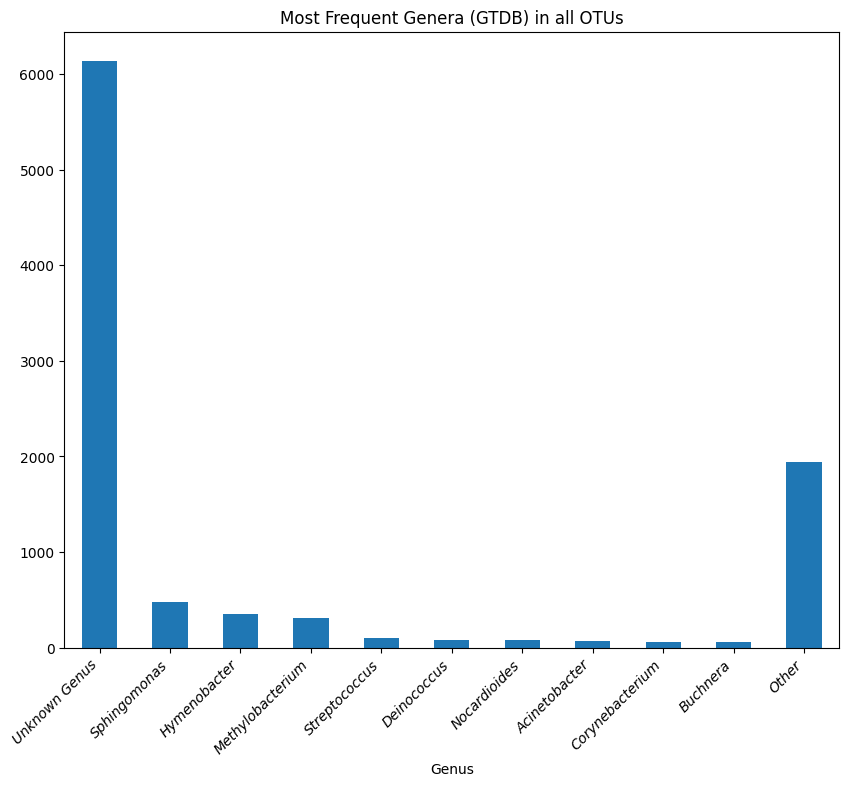

In [23]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each genus
genus_counts = gtdb_taxonomy_copy['Genus'].value_counts()

# Get the top N most frequent genera
top_genus_counts = genus_counts.head(top_n)

# Group the rest into an "Other" category
other_count = genus_counts[top_n:].sum()
top_genus_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_genus_counts.plot.bar()
plt.ylabel('')
plt.title('Most Frequent Genera (GTDB) in all OTUs')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

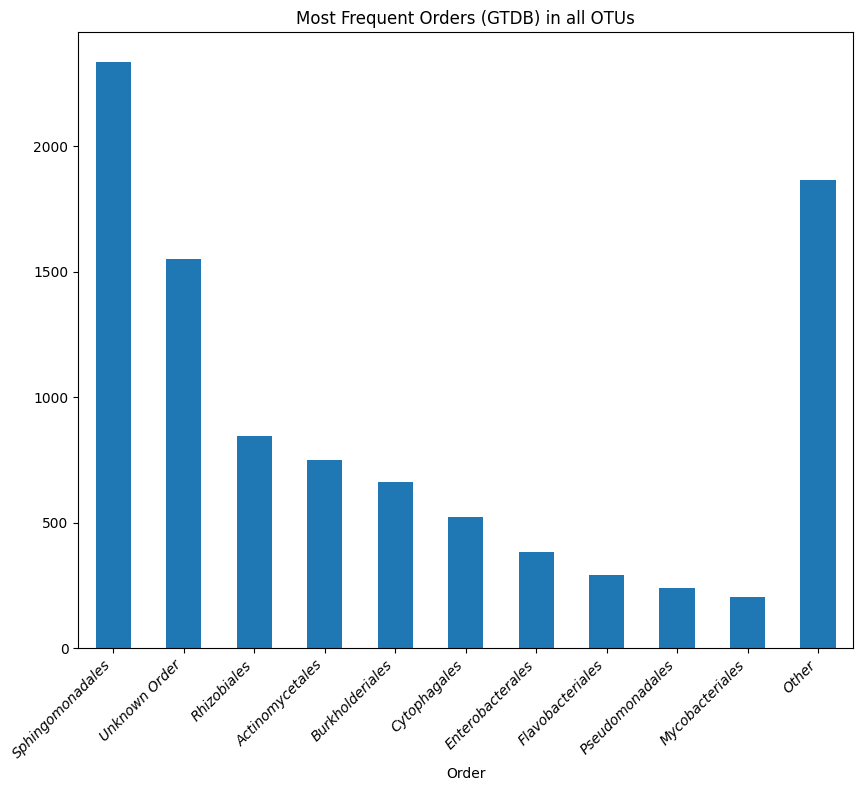

In [22]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each order
order_counts = gtdb_taxonomy_copy['Order'].value_counts()

# Get the top N most frequent orders
top_order_counts = order_counts.head(top_n)

# Group the rest into an "Other" category
other_count = order_counts[top_n:].sum()
top_order_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_order_counts.plot.bar()
plt.ylabel('')
plt.title('Most Frequent Orders (GTDB) in all OTUs')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

In [8]:
filtered_dataset = pd.read_table("/home/santosrac/Projects/UGA_RACS/IntegrationMetataxExpression/SparXCC_OTUs_paper/filtered_otu_table_day_filtered_rel_abund_cv_filtered.tsv",
                                     sep="\t", header=0, index_col=0)
print(filtered_dataset.shape)
filtered_dataset.head()

(276, 176)


,14A0247_8,14A0051_8,14A0381_26,14A0533_26,14A0295_8,14A0169_26,14A0069_8,14A0497_26,14A0023_8,14A0547_26,...,14A0345_8,14A0267_8,14A0009_8,14A0007_8,14A0093_26,14A0137_26,14A0265_8,14A0155_26,14A0167_26,14A0481_26
OTU_ID,,,,,,,,,,,,,,,,,,,,,
969149,0.0,21.0,10.0,1.0,2.0,30.0,0.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3486915,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
808437,1.0,15.0,2.0,41.0,0.0,7.0,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
750840,0.0,0.0,4.0,9.0,1.0,1.0,0.0,2.0,7.0,18.0,...,0.0,0.0,1.0,16.0,0.0,2.0,2.0,0.0,2.0,3.0
542475,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,72.0,0.0,0.0,0.0,1.0,8.0,0.0


Filtering the GTDB OTU taxonomy based on the day dataframe:

In [10]:
filtered_gtdb_taxonomy = gtdb_taxonomy[gtdb_taxonomy['OTU_ID'].isin(filtered_dataset.index)]
filtered_gtdb_taxonomy.set_index('OTU_ID', inplace=True)
filtered_gtdb_taxonomy.head()

,Taxonomy,Confidence
OTU_ID,,
1007180,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.999141
1024188,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.903868
1039092,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.975254
1048878,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999944
107137,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998423


In [18]:
def extract_genus(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('g_'):
            return field.replace('g__', '').strip()
    return "Unknown Genus"

def extract_order(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('o_'):
            return field.replace('o__', '').strip()
    return "Unknown Order"

def extract_family(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('f_'):
            return field.replace('f__', '').strip()
    return "Unknown Family"

filtered_gtdb_taxonomy['Genus'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_genus)
filtered_gtdb_taxonomy['Order'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_order)
filtered_gtdb_taxonomy['Family'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_family)

filtered_gtdb_taxonomy.head()

/tmp/ipykernel_27730/2602326514.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gtdb_taxonomy['Genus'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_genus)
/tmp/ipykernel_27730/2602326514.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gtdb_taxonomy['Order'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_order)
/tmp/ipykernel_27730/2602326514.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Taxonomy,Confidence,Genus,Order,Family
OTU_ID,,,,,
1007180,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.999141,Methylobacterium,Rhizobiales,Beijerinckiaceae
1024188,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.903868,Sphingomonas,Sphingomonadales,Sphingomonadaceae
1039092,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.975254,Chryseobacterium,Flavobacteriales,Weeksellaceae
1048878,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999944,Unknown Genus,Burkholderiales,Burkholderiaceae_B
107137,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998423,Methylobacterium,Rhizobiales,Beijerinckiaceae


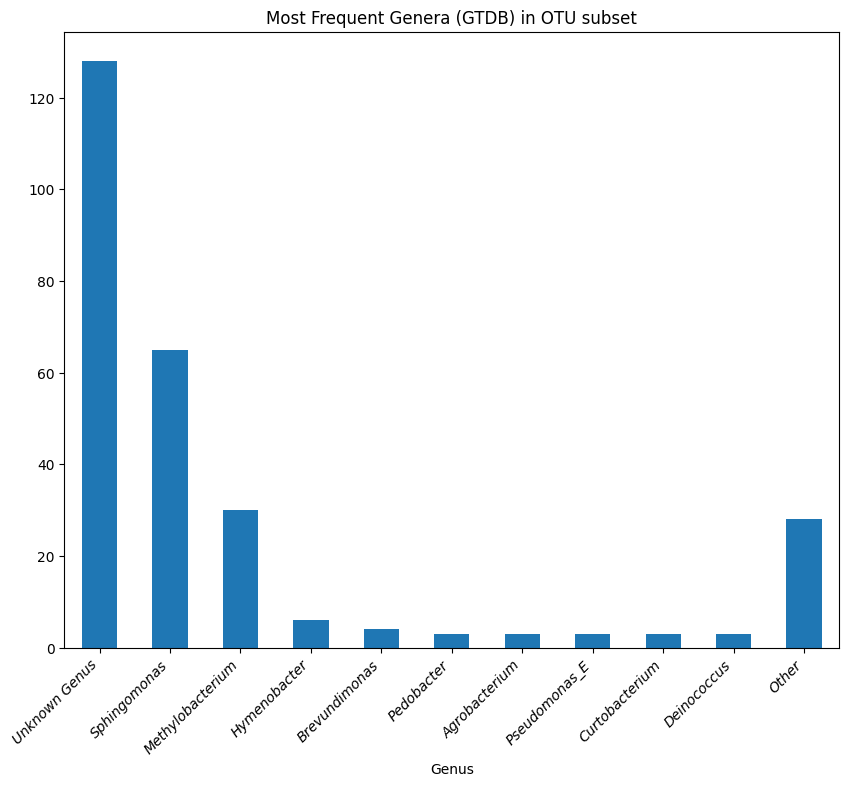

In [24]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each genus
genus_counts = filtered_gtdb_taxonomy['Genus'].value_counts()

# Get the top N most frequent genera
top_genus_counts = genus_counts.head(top_n)

# Group the rest into an "Other" category
other_count = genus_counts[top_n:].sum()
top_genus_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_genus_counts.plot.bar()
plt.ylabel('')
plt.title('Most Frequent Genera (GTDB) in OTU subset')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

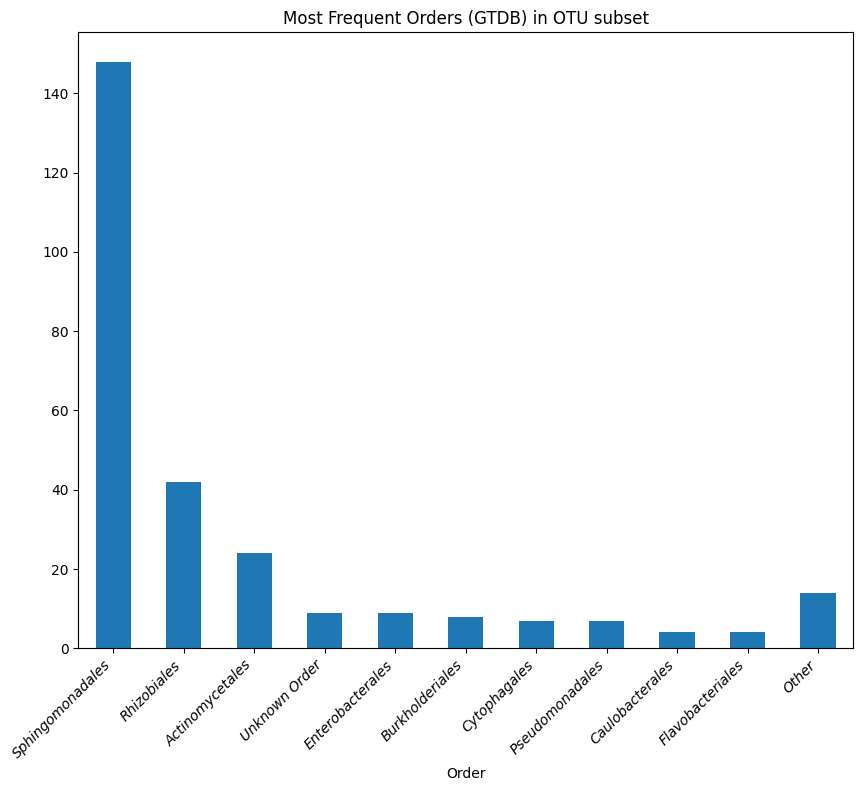

In [25]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each order
order_counts = filtered_gtdb_taxonomy['Order'].value_counts()

# Get the top N most frequent orders
top_order_counts = order_counts.head(top_n)

# Group the rest into an "Other" category
other_count = order_counts[top_n:].sum()
top_order_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_order_counts.plot.bar()
plt.ylabel('')
plt.title('Most Frequent Orders (GTDB) in OTU subset')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

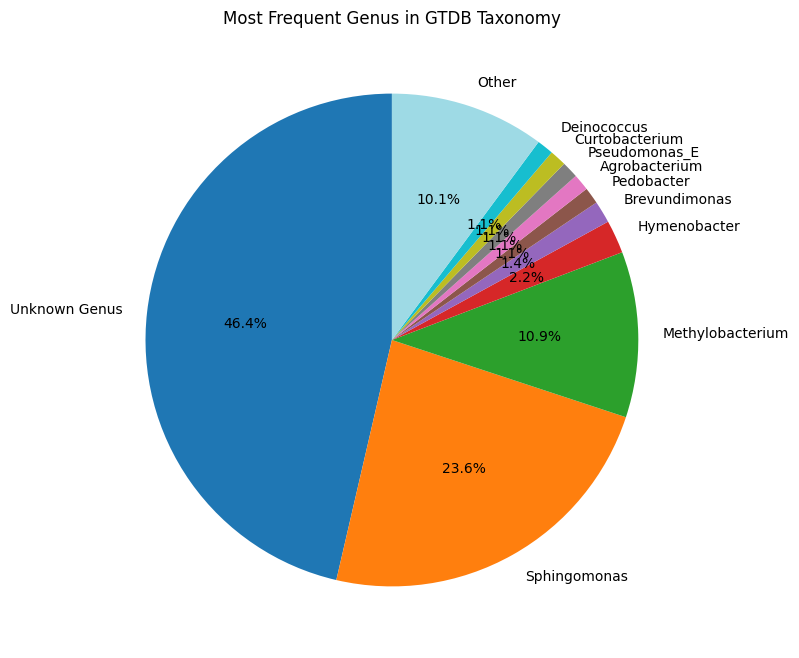

In [103]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each genus
genus_counts = filtered_gtdb_taxonomy['Genus'].value_counts()

# Get the top N most frequent genera
top_genus_counts = genus_counts.head(top_n)

# Group the rest into an "Other" category
other_count = genus_counts[top_n:].sum()
top_genus_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_genus_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_genus_counts.index)
plt.ylabel('')
plt.title('Most Frequent Genus in GTDB Taxonomy')
plt.show()

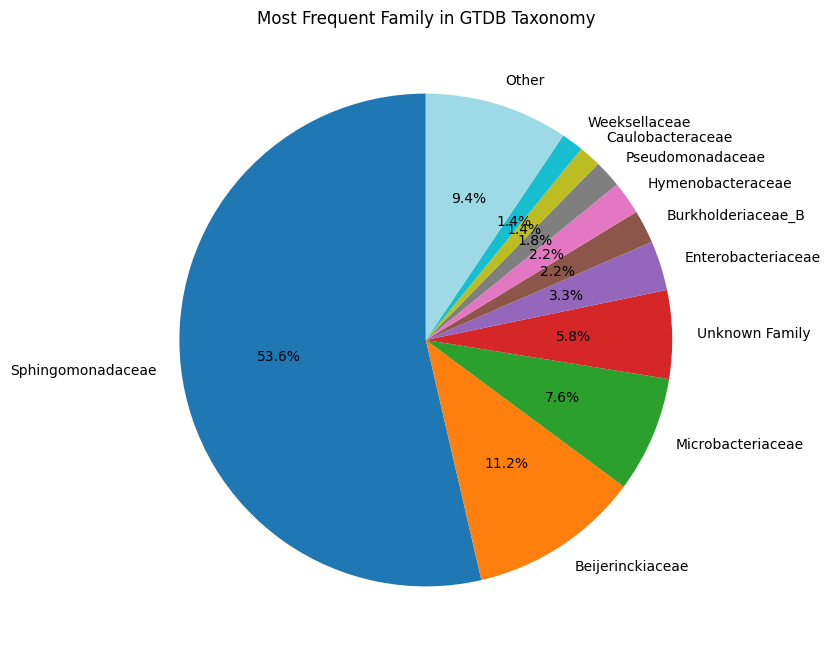

In [104]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each family
family_counts = filtered_gtdb_taxonomy['Family'].value_counts()

# Get the top N most frequent families
top_family_counts = family_counts.head(top_n)

# Group the rest into an "Other" category
other_count = family_counts[top_n:].sum()
top_family_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_family_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_family_counts.index)
plt.ylabel('')
plt.title('Most Frequent Family in GTDB Taxonomy')
plt.show()

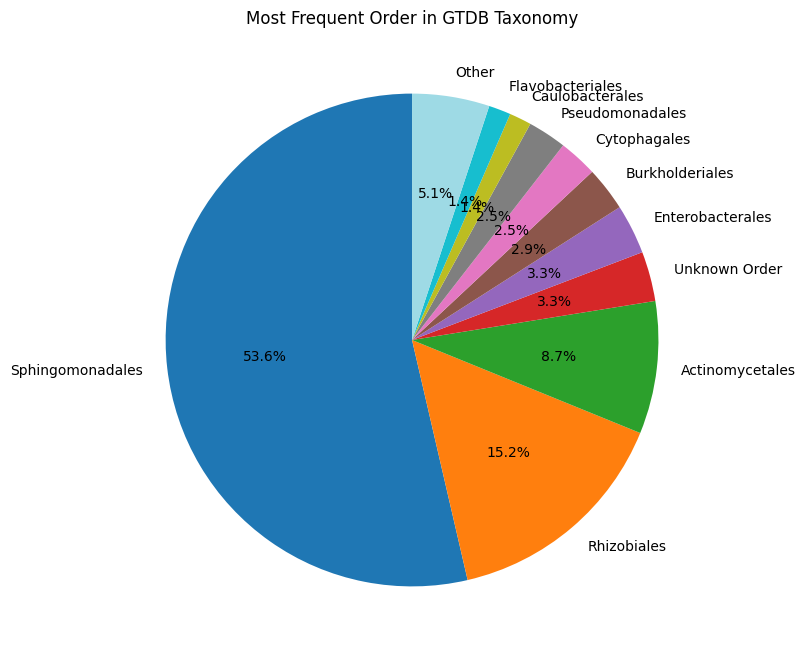

In [105]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each order
order_counts = filtered_gtdb_taxonomy['Order'].value_counts()

# Get the top N most frequent orders
top_order_counts = order_counts.head(top_n)

# Group the rest into an "Other" category
other_count = order_counts[top_n:].sum()
top_order_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_order_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_order_counts.index)
plt.ylabel('')
plt.title('Most Frequent Order in GTDB Taxonomy')
plt.show()

## Taxonomy associated with OTUs in significant cross-correlations

Importing SparXCC cross-correlations:

In [144]:
import pandas as pd

day_sparxcc = pd.read_table("/home/renato/projects/fapesp_bepe_pd/integration_transcriptome_microbiome/SparXCC_output_day_common_samples_edgelist.tsv",
              sep="\t", index_col=0)
night_sparxcc = pd.read_table("/home/renato/projects/fapesp_bepe_pd/integration_transcriptome_microbiome/SparXCC_output_night_common_samples_edgelist.tsv",
              sep="\t", index_col=0)

In [156]:
print(day_sparxcc.shape[0], "OTUs with cross-correlations in day")
print(day_sparxcc.index.unique().shape[0], "unique OTUs in day cross-correlations")
print(night_sparxcc.shape[0], "OTUs with cross-correlations in night")
print(night_sparxcc.index.unique().shape[0], "unique OTUs in night cross-correlations")

685 OTUs with cross-correlations in day
77 unique OTUs in day cross-correlations
1636 OTUs with cross-correlations in night
83 unique OTUs in night cross-correlations


In [158]:
day_sparxcc.rename_axis('OTU_ID', inplace=True)
night_sparxcc.rename_axis('OTU_ID', inplace=True)

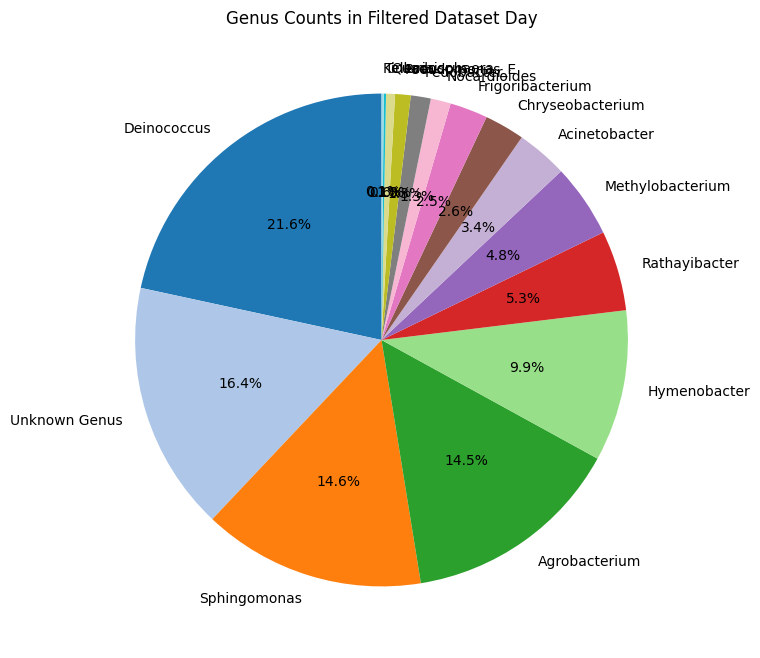

In [162]:
cross_correlations_day_with_taxonomy = day_sparxcc.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')

plt.figure(figsize=(10, 8))
cross_correlations_day_with_taxonomy['Genus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=cross_correlations_day_with_taxonomy['Genus'].value_counts().index)
plt.ylabel('')
plt.title('Genus Counts in Filtered Dataset Day')
plt.show()

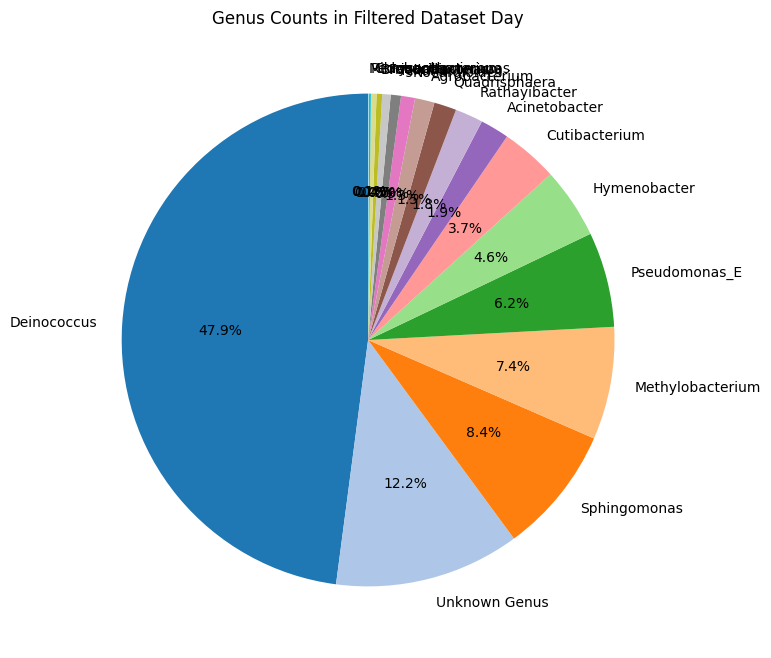

In [ ]:
cross_correlations_night_with_taxonomy = night_sparxcc.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')

plt.figure(figsize=(10, 8))
cross_correlations_night_with_taxonomy['Genus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=cross_correlations_night_with_taxonomy['Genus'].value_counts().index)
plt.ylabel('')
plt.title('Genus Counts in Filtered Dataset Night')
plt.show()

## Taxonomy associated with potential keystone species

Importing the Zi/Pi metrics for day and night samples:

In [11]:
import pandas as pd

day_network_zi_pi_metrics = pd.read_table("/home/santosrac/Repositories/maize_transcriptome_microbiome_networks/day_network_zi_pi_metrics.tsv",
              sep="\t", index_col=0)
night_network_zi_pi_metrics = pd.read_table("/home/santosrac/Repositories/maize_transcriptome_microbiome_networks/night_network_zi_pi_metrics.tsv",
              sep="\t", index_col=0)

In [2]:
day_network_zi_pi_metrics.rename_axis('OTU_ID', inplace=True)
night_network_zi_pi_metrics.rename_axis('OTU_ID', inplace=True)

In [12]:
day_mod_hubs = day_network_zi_pi_metrics[(day_network_zi_pi_metrics['Zi'] > 2.5) & (day_network_zi_pi_metrics['Pi'] < 0.62)]
night_mod_hubs = night_network_zi_pi_metrics[(night_network_zi_pi_metrics['Zi'] > 2.5) & (night_network_zi_pi_metrics['Pi'] < 0.62)]
print(day_mod_hubs.shape)
print(night_mod_hubs.shape)

(3, 3)
(2, 3)


In [13]:
day_connectors = day_network_zi_pi_metrics[(day_network_zi_pi_metrics['Zi'] < 2.5) & (day_network_zi_pi_metrics['Pi'] > 0.62)]
night_connectors = night_network_zi_pi_metrics[(night_network_zi_pi_metrics['Zi'] < 2.5) & (night_network_zi_pi_metrics['Pi'] > 0.62)]
print(day_connectors.shape)
print(night_connectors.shape)

(21, 3)
(13, 3)


In [14]:
day_mod_hubs_with_taxonomy = day_mod_hubs.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')
day_mod_hubs_with_taxonomy.head()

,Louvain_Module,Zi,Pi,Taxonomy,Confidence
OTU_ID,,,,,
241895,1,3.032766,0.304498,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201
332293,1,2.667631,0.401384,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.858205
930834,1,3.763036,0.000000,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.838322


In [15]:
night_mod_hubs_with_taxonomy = night_mod_hubs.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')
night_mod_hubs_with_taxonomy.head()

,Louvain_Module,Zi,Pi,Taxonomy,Confidence
OTU_ID,,,,,
241895,1,3.012851,0.277778,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201
240451,1,3.012851,0.349030,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,0.996430


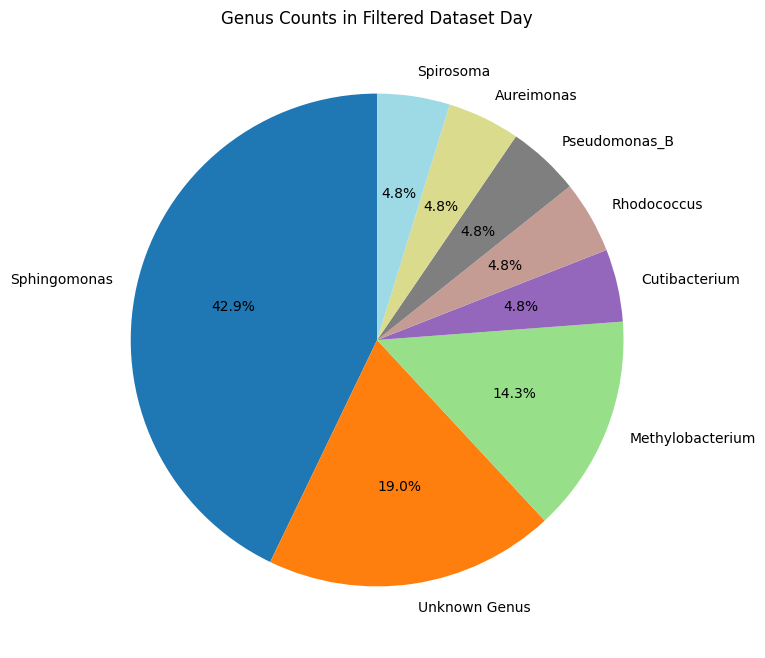

In [19]:
import matplotlib.pyplot as plt

day_connectors_with_taxonomy = day_connectors.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')

plt.figure(figsize=(10, 8))
day_connectors_with_taxonomy['Genus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=day_connectors_with_taxonomy['Genus'].value_counts().index)
plt.ylabel('')
plt.title('Genus Counts in Filtered Dataset Day')
plt.show()

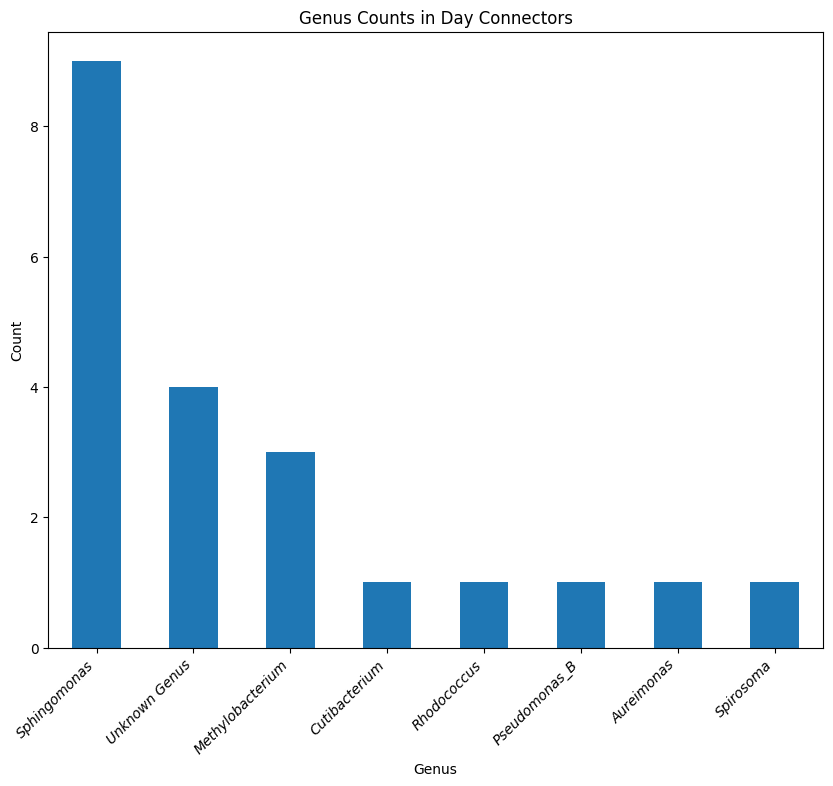

In [23]:
import matplotlib.pyplot as plt

# Plot the bar chart for day connectors with taxonomy
plt.figure(figsize=(10, 8))
day_connectors_with_taxonomy['Genus'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Genus Counts in Day Connectors')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

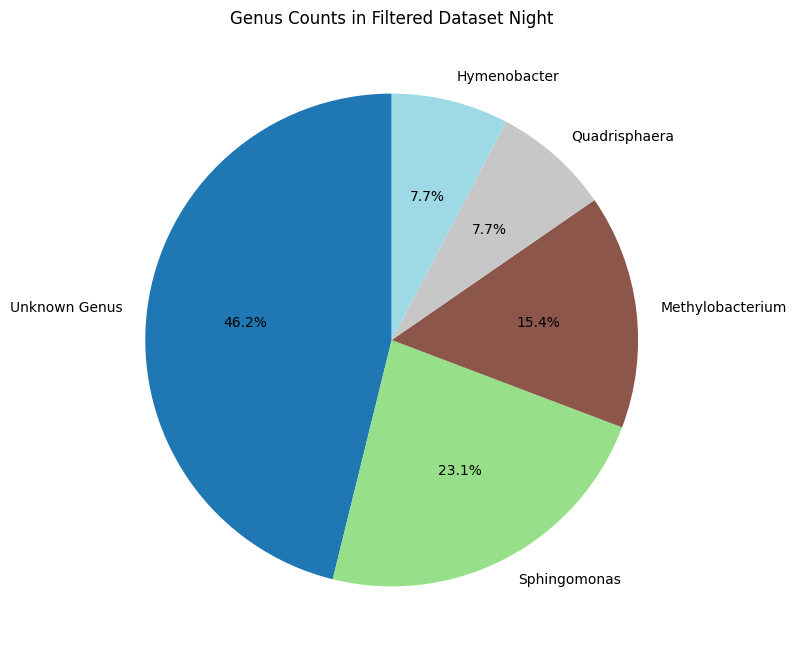

In [20]:
night_connectors_with_taxonomy = night_connectors.merge(filtered_gtdb_taxonomy, left_index=True, right_on='OTU_ID')

plt.figure(figsize=(10, 8))
night_connectors_with_taxonomy['Genus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=night_connectors_with_taxonomy['Genus'].value_counts().index)
plt.ylabel('')
plt.title('Genus Counts in Filtered Dataset Night')
plt.show()

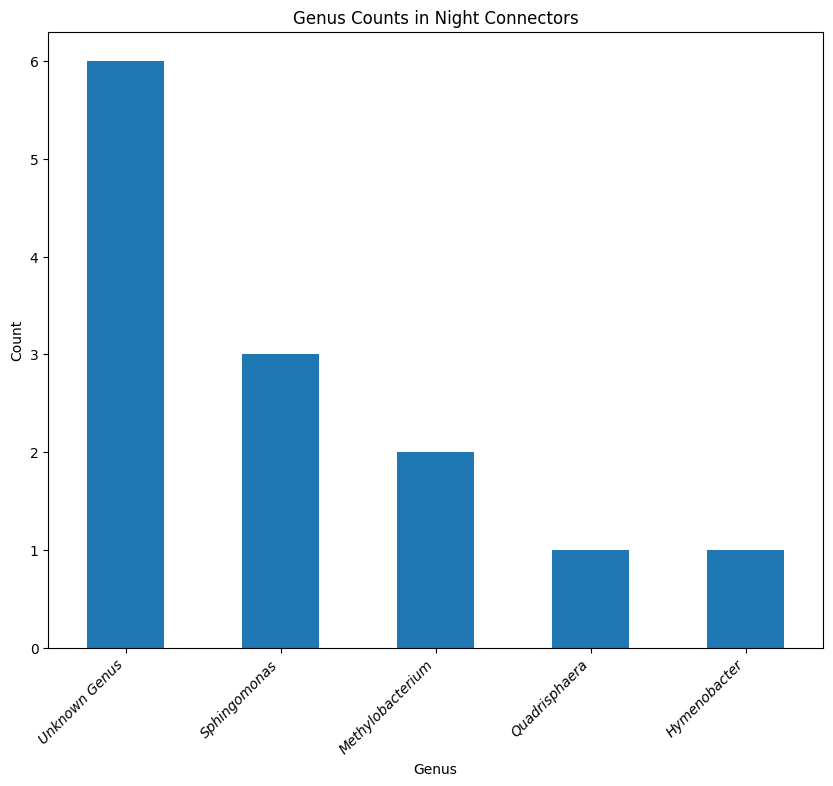

In [22]:
import matplotlib.pyplot as plt

# Plot the bar chart for night connectors with taxonomy
plt.figure(figsize=(10, 8))
night_connectors_with_taxonomy['Genus'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Genus Counts in Night Connectors')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

## Potential keystone species in cross-correlations

Check what are the module hubs and connectors that also have cross-correlations with gene expression in the day and the night samples:

In [139]:
day_sparxcc.merge(day_mod_hubs_with_taxonomy, left_index=True, right_on='OTU_ID').index.unique().shape

(2,)

In [166]:
day_sparxcc.merge(day_mod_hubs_with_taxonomy, left_index=True, right_on='OTU_ID')

,Gene,CorrelationCoefficient,Louvain_Module,Zi,Pi,Taxonomy,Confidence,Genus,Order,Family
OTU_ID,,,,,,,,,,
241895,Zm00001eb350630_T001,0.438644,1,3.766305,0.110727,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb343390_T001,-0.449244,1,3.766305,0.110727,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb258790_T001,-0.454991,1,3.766305,0.110727,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb253650_T002,0.429375,1,3.766305,0.110727,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb355540_T002,0.416406,1,3.766305,0.110727,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
...,...,...,...,...,...,...,...,...,...,...
930834,Zm00001eb033470_T002,-0.402422,1,3.405406,0.117188,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.838322,Pseudomonas_E,Pseudomonadales,Pseudomonadaceae
930834,Zm00001eb287190_T003,-0.404813,1,3.405406,0.117188,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.838322,Pseudomonas_E,Pseudomonadales,Pseudomonadaceae
930834,Zm00001eb147780_T001,-0.434640,1,3.405406,0.117188,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.838322,Pseudomonas_E,Pseudomonadales,Pseudomonadaceae


In [140]:
night_sparxcc.merge(night_mod_hubs_with_taxonomy, left_index=True, right_on='OTU_ID').index.unique().shape

(1,)

In [167]:
night_sparxcc.merge(night_mod_hubs_with_taxonomy, left_index=True, right_on='OTU_ID')

,Gene,CorrelationCoefficient,Louvain_Module,Zi,Pi,Taxonomy,Confidence,Genus,Order,Family
OTU_ID,,,,,,,,,,
241895,Zm00001eb370990_T002,-0.404645,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb370730_T001,0.453003,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb369560_T001,-0.405962,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb363950_T001,-0.429581,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb362820_T001,0.502129,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
...,...,...,...,...,...,...,...,...,...,...
241895,Zm00001eb363330_T001,-0.411473,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb280580_T001,0.427338,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae
241895,Zm00001eb281500_T001,0.394884,1,2.76485,0.364198,d__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.991201,Deinococcus,Deinococcales,Deinococcaceae


In [141]:
day_sparxcc.merge(day_connectors_with_taxonomy, left_index=True, right_on='OTU_ID').index.unique().shape

(3,)

In [168]:
day_sparxcc.merge(day_connectors_with_taxonomy, left_index=True, right_on='OTU_ID')

,Gene,CorrelationCoefficient,Louvain_Module,Zi,Pi,Taxonomy,Confidence,Genus,Order,Family
OTU_ID,,,,,,,,,,
580992,Zm00001eb238170_T001,-0.400197,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb332650_T001,-0.403242,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb033390_T001,-0.491468,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb140540_T001,-0.448474,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb375130_T001,0.414223,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb352550_T001,-0.404526,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb168100_T001,-0.403345,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb092540_T001,-0.449728,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae
580992,Zm00001eb102480_T001,-0.412808,1,-0.203584,0.722222,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998304,Sphingomonas,Sphingomonadales,Sphingomonadaceae


In [142]:
night_sparxcc.merge(night_connectors_with_taxonomy, left_index=True, right_on='OTU_ID').index.unique().shape

(10,)

In [169]:
night_sparxcc.merge(night_connectors_with_taxonomy, left_index=True, right_on='OTU_ID')

,Gene,CorrelationCoefficient,Louvain_Module,Zi,Pi,Taxonomy,Confidence,Genus,Order,Family
OTU_ID,,,,,,,,,,
487725,Zm00001eb228330_T001,-0.383568,5,-2.527957,0.656250,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.994414,Sphingomonas,Sphingomonadales,Sphingomonadaceae
487725,Zm00001eb045450_T001,0.398565,5,-2.527957,0.656250,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.994414,Sphingomonas,Sphingomonadales,Sphingomonadaceae
487725,Zm00001eb227690_T001,-0.387470,5,-2.527957,0.656250,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.994414,Sphingomonas,Sphingomonadales,Sphingomonadaceae
487725,Zm00001eb199590_T002,0.409523,5,-2.527957,0.656250,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.994414,Sphingomonas,Sphingomonadales,Sphingomonadaceae
487725,Zm00001eb102090_T007,-0.425390,5,-2.527957,0.656250,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.994414,Sphingomonas,Sphingomonadales,Sphingomonadaceae
...,...,...,...,...,...,...,...,...,...,...
New.ReferenceOTU1026,Zm00001eb179570_T001,0.484310,8,-2.408201,0.809917,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.788147,Methylobacterium,Rhizobiales,Beijerinckiaceae
New.ReferenceOTU1026,Zm00001eb088050_T001,0.400470,8,-2.408201,0.809917,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.788147,Methylobacterium,Rhizobiales,Beijerinckiaceae
New.ReferenceOTU1026,Zm00001eb067750_T003,-0.387451,8,-2.408201,0.809917,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.788147,Methylobacterium,Rhizobiales,Beijerinckiaceae
